## Overview map: speed in sigma range and sections

In [1]:
import cmocean.cm as cmo
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

## Data

In [2]:
## VIKING20X.L46-KKG36107B (VJs)
path_VJs = '/sfs/fs1/work-geomar/smomw379/DATA/VIKING20X.L46-KKG36107B/'
ds_VJs = xr.open_mfdataset(path_VJs + '1_VIKING20X.L46-KKG36107B_10yr_*_speed_on_sig0.nc.interp',
                           combine='by_coords').mean('time_counter')


## Speed in density range

In [3]:
print(f'Density range: {ds_VJs.deptht[46].values :.2f} : {ds_VJs.deptht[49].values :.2f} ')
VJs_speed = ds_VJs.voocecur.isel(deptht=range(46,50)).mean('deptht').compute()

Density range: 27.65 : 27.95 


/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## Define Sections

In [4]:
LS53N = [(-52,-49),(52.68,53.88)]
#LineW = [(-71.5,-64),(41.834,31.7889)]
RAPID = [(-78,-14),(26.5,26.5)]
NBC11S = [(-36.09,-34.2),(-10.15,-11.5)]

## Plotting

In [5]:
land = cfeature.GSHHSFeature(scale='intermediate', edgecolor='k', linewidth=0.7, facecolor='grey')

In [6]:
colorlist = (
    (0.01 * 94.902, 0.01 * 94.510, 0.01 * 94.902),
    (0.01 * 94.510, 0.01 * 88.627, 0.01 * 94.118),
    (0.01 * 69.804, 0.01 * 62.745, 0.01 * 80.392),
    (0.01 * 50.196, 0.01 * 65.098, 0.01 * 80.784),
    (0.01 * 40.392, 0.01 * 75.686, 0.01 * 60.784),
    (0.01 * 33.725, 0.01 * 69.412, 0.01 * 20.000),
    (0.01 * 80.000, 0.01 * 90.588, 0.01 * 4.314),
    (0.01 * 98.039, 0.01 * 96.078, 0.01 * 9.804),
    (0.01 * 97.255, 0.01 * 50.980, 0.01 * 6.667),
    (0.01 * 98.039, 0.01 *  7.059, 0.01 * 4.706),
    (0.01 * 59.608, 0.01 *  5.882, 0.01 * 3.137)
    )
cm = matplotlib.colors.LinearSegmentedColormap.from_list('DIF', colorlist, N = 255)

In [7]:
#levels = np.concatenate([np.arange(0,10.1,0.5), np.arange(11,19,1), np.arange(20,51,5)])
#levels = np.concatenate([np.arange(0,10.1,0.25), np.arange(11,19,1), np.arange(20,51,5)])
#levels = np.concatenate([np.arange(0,4,0.5), np.arange(4,10.1,0.25), np.arange(11,19,1), np.arange(20,51,5)])
levels = np.concatenate([np.arange(0,10.1,0.25), np.arange(11,21,1), np.arange(25,61,5)])

norm = matplotlib.colors.BoundaryNorm(levels, 255)

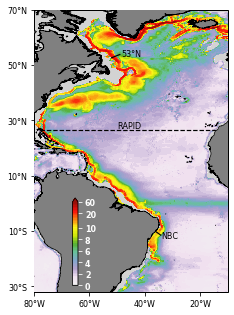

In [8]:
fig = plt.figure(figsize=(3.25,4.5))

ax=fig.add_axes([0.1,0.08,0.87,0.87], projection=ccrs.PlateCarree())

ax.set_extent([-80,-10,-32,70], crs=ccrs.PlateCarree())
ax.add_feature(land, zorder=20)

ax.contourf([-80,-10], [-32, 70], np.zeros((2,2)), colors='lightgrey', zorder=1)
ct = ax.contourf(ds_VJs.nav_lon, ds_VJs.nav_lat, VJs_speed*100, cmap=cm, levels=levels,
                 extend='max', norm=norm, zorder=10)

## colorbar
ax_cb=fig.add_axes([0.03,0.10,0.3,0.27], frameon = False); 
ax_cb.set_xticks([]); ax_cb.set_yticks([])
ticks = [0, 2, 4, 6, 8, 10, 20, 60]
cb = plt.colorbar(ct, ax=ax_cb, aspect=15, ticks=ticks)
cb.ax.yaxis.set_tick_params(color='w')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w', fontweight='bold', fontsize=8);

## sections
ax.text(-48.4, 53.3, '53°N', fontsize=8, zorder=15, color='k')
ax.plot(LS53N[0], LS53N[1], color='k', linewidth=1.2, linestyle='-', zorder=15)

ax.text(-50, 27.2, 'RAPID', fontsize=8, zorder=15, color='k')
ax.plot(RAPID[0], RAPID[1], color='k', linewidth=1.2, linestyle='--', zorder=15)

ax.text(-34, -12.5, 'NBC', fontsize=8, zorder=15, color='k')
ax.plot(NBC11S[0], NBC11S[1], color='k', linewidth=1.2, linestyle='-', zorder=15)

## ticks 
ax.set_xticks(np.arange(-80,-10,20), crs = ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,80,20), crs = ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#plt.savefig('figure07.png', dpi=150)

## Save data 

In [11]:
VJs_speed.attrs['long_name'] = 'Average speed in density range 27.65 - 27.95 kg/m^3'
VJs_speed.attrs['units'] = 'm/s'

lat = ds_VJs.nav_lat
lat.attrs['standard_name'] = 'latitude'
lat.attrs['long_name'] = 'Latitude'
lat.attrs['units'] = 'degrees_north'

lon = ds_VJs.nav_lon
lon.attrs['standard_name'] = 'longitude'
lon.attrs['long_name'] = 'Longitude'
lon.attrs['units'] = 'degrees_east'

In [19]:
dsout = xr.Dataset(data_vars = {'voocecur':VJs_speed, 
                                'nav_lat':ds_VJs.nav_lat, 
                                'nav_lon':ds_VJs.nav_lon})

dsout.attrs['title'] = 'Average speed in density range 27.65 - 27.95 kg/m^3 (1990-2009)'
dsout.attrs['institution'] = 'GEOMAR Helmholtz Centre for Ocean Research Kiel'
dsout.attrs['creator_name'] = 'Tobias Schulzki'
dsout.attrs['creator_email'] = 'tschulzki@geomar.de'
dsout.attrs['creator_url'] = 'orcid.org/0000-0002-3480-8492'
dsout.attrs['license'] = 'CC BY 4.0'
dsout.attrs['keywords'] = 'speed, density coordinates, numerical model'
#dsout.attrs['summary'] = 'Created in python'


In [20]:
outpath='/gxfs_work1/geomar/smomw379/Publications/Biastoch2020/DATA/'
dsout.to_netcdf(outpath + 'data_figure07.nc')